In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [231]:
data= pd.read_csv('/content/drive/MyDrive/Optim_ml/cancer.csv')
data.head()

,Patient_ID,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,Patient0000,68,Male,Current Smoker,81.678677,Lower Lobe,Stage III,Surgery,44,Hispanic,...,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,Patient0001,58,Male,Never Smoked,78.448272,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,...,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,Patient0002,44,Male,Former Smoker,67.714305,Lower Lobe,Stage I,Chemotherapy,69,African American,...,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,Patient0003,72,Male,Current Smoker,70.806008,Lower Lobe,Stage III,Chemotherapy,95,African American,...,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,Patient0004,37,Female,Never Smoked,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,...,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456


In [152]:
data.shape

(23658, 38)

In [ ]:
data.isna().sum()

Patient_ID                          0
Age                                 0
Gender                              0
Smoking_History                     0
Tumor_Size_mm                       0
Tumor_Location                      0
Stage                               0
Treatment                           0
Survival_Months                     0
Ethnicity                           0
Insurance_Type                      0
Family_History                      0
Comorbidity_Diabetes                0
Comorbidity_Hypertension            0
Comorbidity_Heart_Disease           0
Comorbidity_Chronic_Lung_Disease    0
Comorbidity_Kidney_Disease          0
Comorbidity_Autoimmune_Disease      0
Comorbidity_Other                   0
Performance_Status                  0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Blood_Pressure_Pulse                0
Hemoglobin_Level                    0
White_Blood_Cell_Count              0
Platelet_Count                      0
Albumin_Leve

In [ ]:
#data['Stage']=data['Stage'].map({'Stage I':1,'Stage II':2,'Stage III':3,'Stage IV':4})

In [ ]:
#data[['Age','Stage']].groupby(['Age'],as_index=False).mean().sort_values(by='Stage',ascending=False)

,Age,Stage
30,60,2.662946
39,69,2.612903
34,64,2.590708
0,30,2.574786
31,61,2.562900
6,36,2.561135
46,76,2.556225
1,31,2.554852
37,67,2.546436
41,71,2.545064


In [ ]:
'''subset_of_variables= data.select_dtypes(include=['int64','float64'])
subset_of_variables.head()'''

,Age,Tumor_Size_mm,Survival_Months,Performance_Status,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Blood_Pressure_Pulse,Hemoglobin_Level,White_Blood_Cell_Count,Platelet_Count,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,68,81.678677,44,3,161,99,92,13.538000,9.800707,321.735266,...,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,58,78.448272,101,4,101,91,93,16.800312,4.378428,251.581538,...,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,44,67.714305,69,0,109,74,81,14.473493,6.157792,393.456532,...,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,72,70.806008,95,1,103,85,68,17.442063,6.259383,275.177898,...,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,37,87.272433,105,0,165,69,99,13.545171,5.203516,381.705572,...,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456


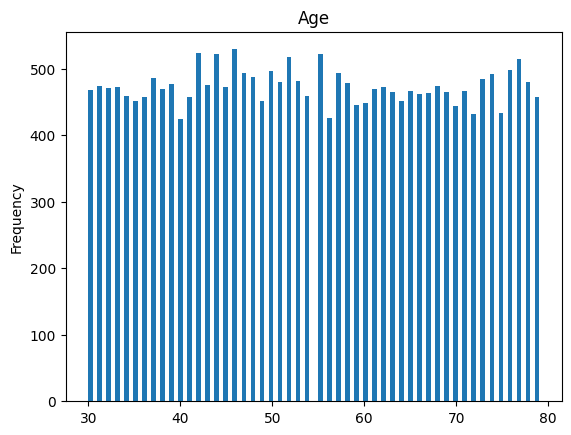

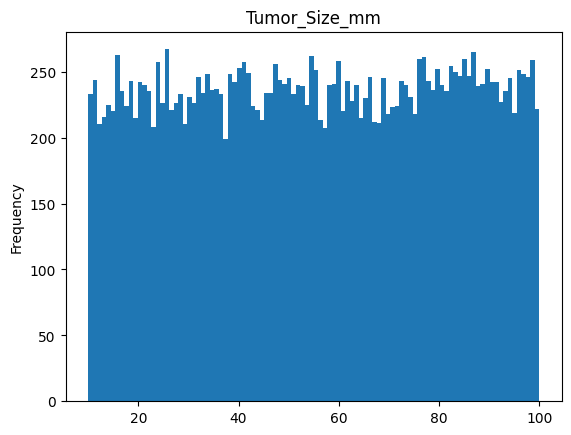

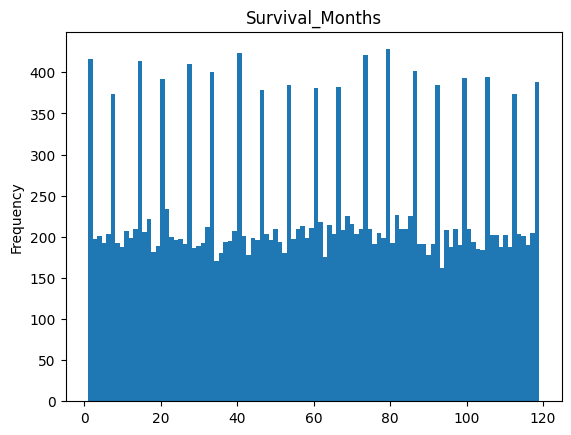

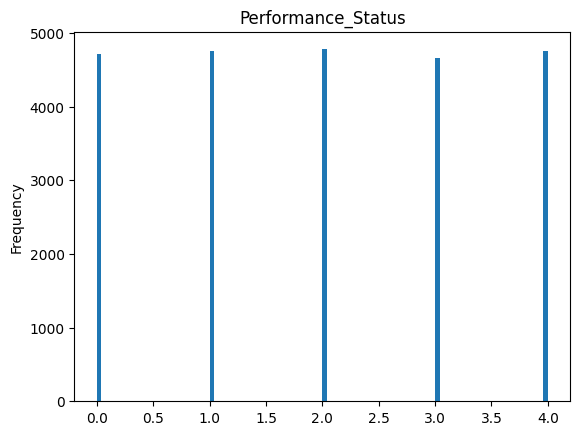

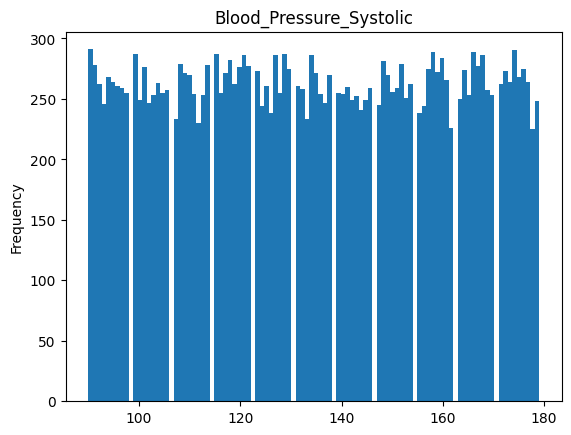

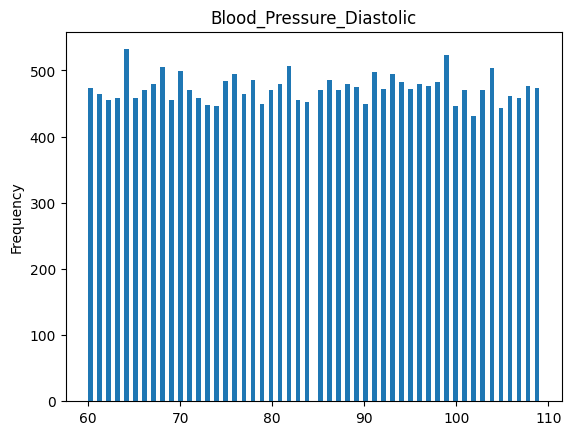

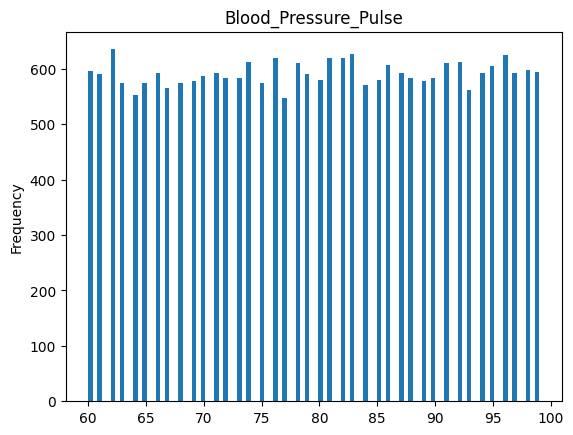

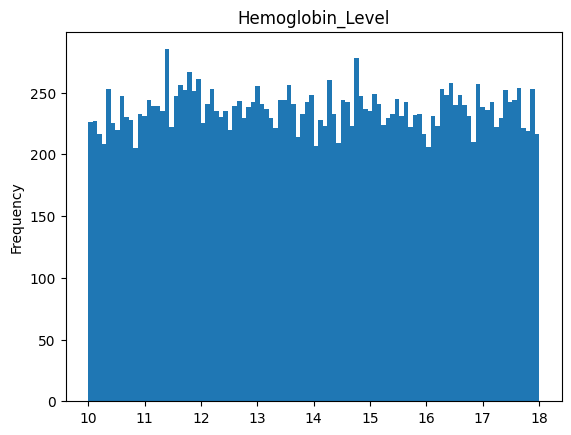

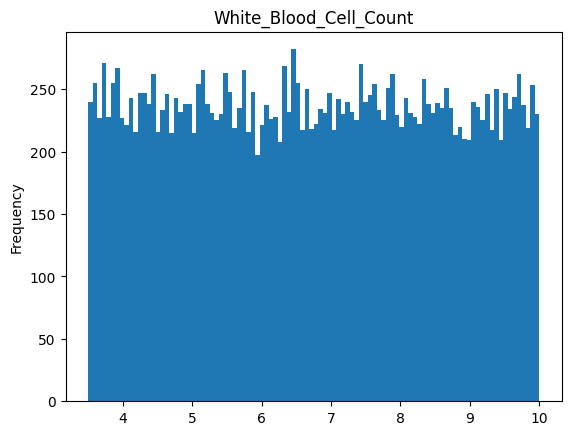

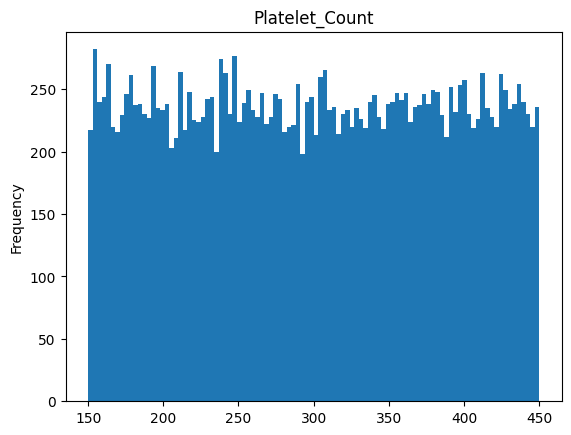

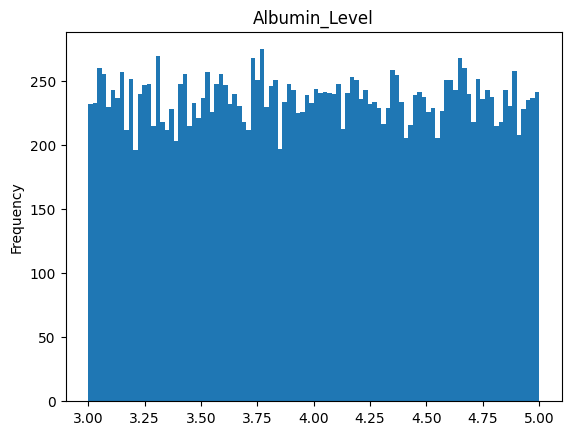

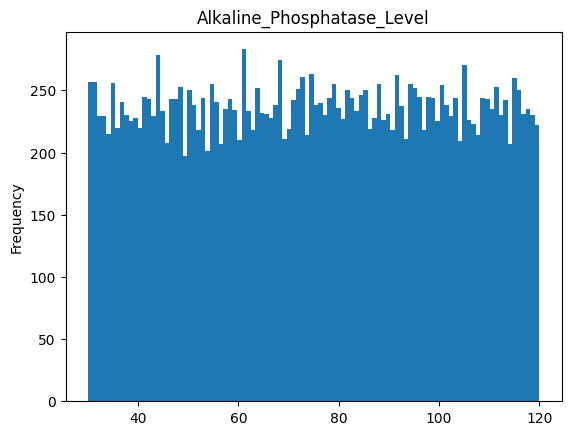

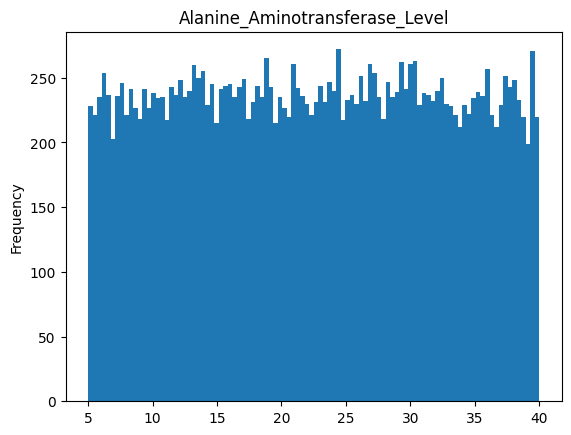

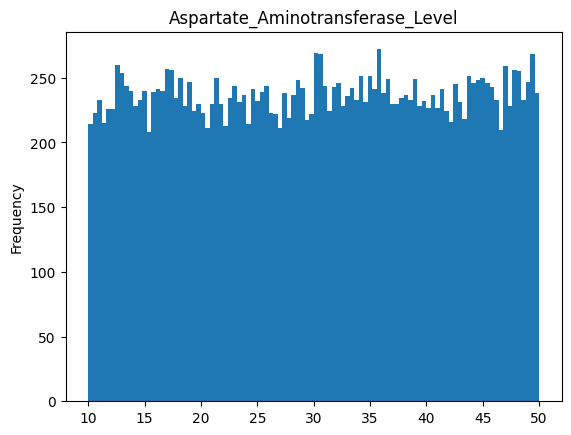

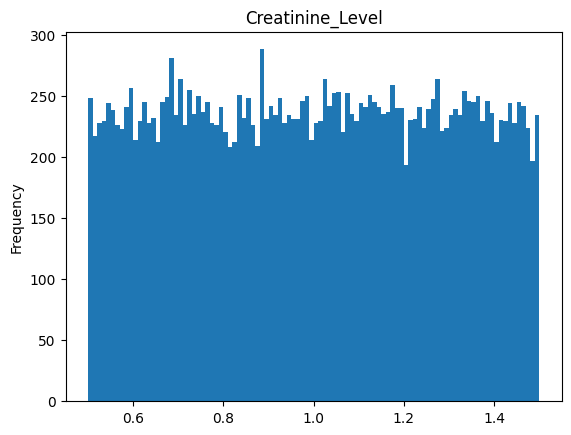

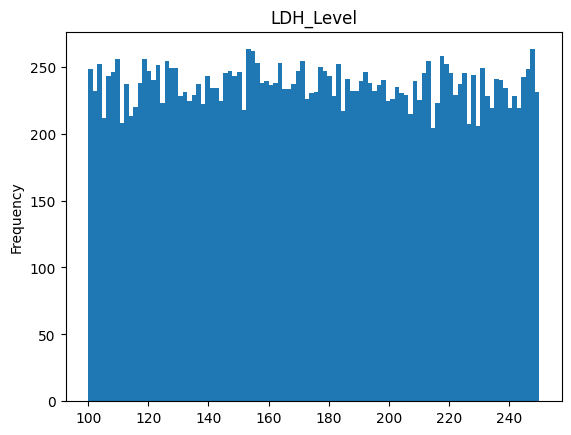

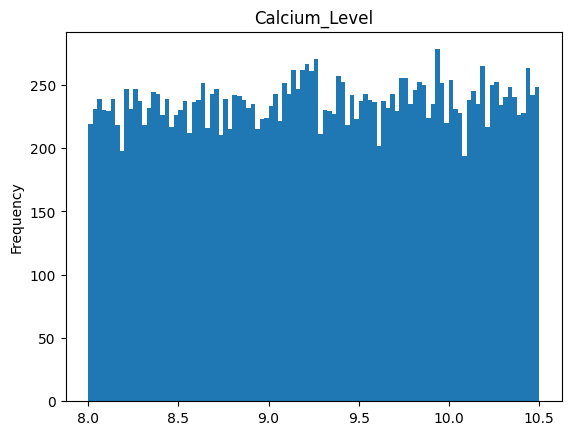

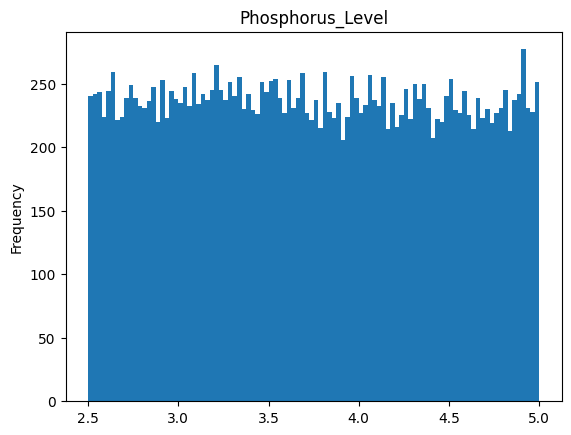

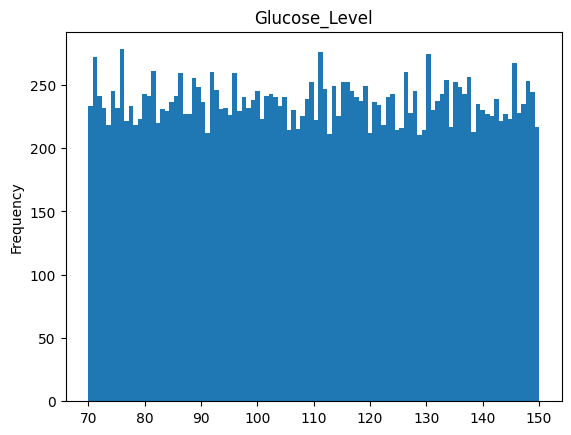

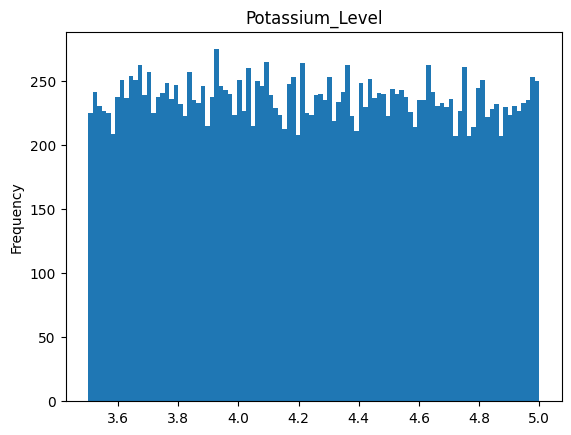

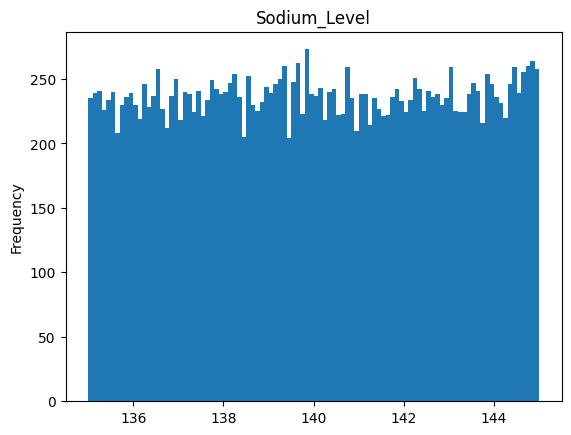

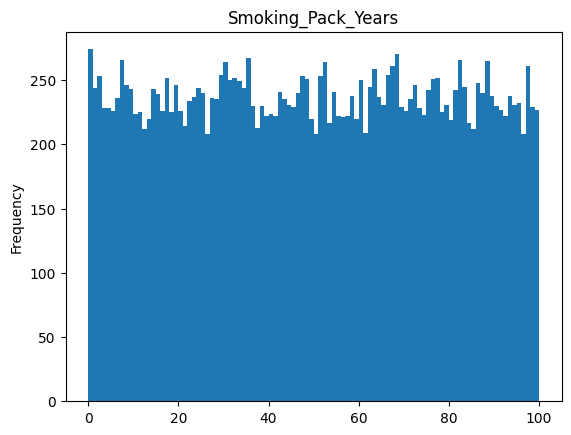

In [ ]:
'''from matplotlib import pyplot as plt
for c in subset_of_variables.columns:
  data[c].plot(kind='hist', bins=100, title=c)
  plt.show()
'''

In [232]:
np.random.seed(42)

In [233]:
mapping={'Stage I':1,'Stage II':2,'Stage III':3,'Stage IV':4}
data['Stage']=data['Stage'].map(mapping)
data=data.drop(columns=['Patient_ID'], axis=1)

In [198]:
data.head()

,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,Insurance_Type,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,68,Male,Current Smoker,81.678677,Lower Lobe,3,Surgery,44,Hispanic,Medicare,...,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,58,Male,Never Smoked,78.448272,Lower Lobe,1,Radiation Therapy,101,Caucasian,Private,...,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,44,Male,Former Smoker,67.714305,Lower Lobe,1,Chemotherapy,69,African American,Other,...,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,72,Male,Current Smoker,70.806008,Lower Lobe,3,Chemotherapy,95,African American,Medicare,...,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,37,Female,Never Smoked,87.272433,Lower Lobe,4,Radiation Therapy,105,Asian,Medicaid,...,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456


In [234]:
X=data.drop(columns=['Stage'],axis=1)
y=data['Stage']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,stratify=y_train)

In [235]:

def min_max_scaling(train_x, val_x, test_x, cols):
    train_x_scale = train_x.copy()
    val_x_scale = val_x.copy()
    test_x_scale = test_x.copy()
    scaler = MinMaxScaler()
    for features in cols:
        feature_train = train_x_scale[features].to_numpy().reshape(-1, 1)
        feature_val = val_x_scale[features].to_numpy().reshape(-1, 1)
        feature_test = test_x_scale[features].to_numpy().reshape(-1, 1)

        scaled_train = np.squeeze(scaler.fit_transform(feature_train))
        scaled_val = np.squeeze(scaler.transform(feature_val))
        scaled_test = np.squeeze(scaler.transform(feature_test))

        train_x_scale[features] = scaled_train
        val_x_scale[features] = scaled_val
        test_x_scale[features] = scaled_test

    return train_x_scale, val_x_scale, test_x_scale

In [236]:
features=X_train.select_dtypes(include=['int64','float64']).columns
train_data_minmax, val_data_minmax, test_data_minmax = min_max_scaling(X_train, X_val, X_test, features)

In [237]:
from sklearn.preprocessing import normalize
def normalization_categorical(train_x, val_x, test_x, norm_type):
    x_train_normalized = train_x.copy()
    x_val_normalized = val_x.copy()
    x_test_normalized = test_x.copy()

    no_cat_columns = x_train_normalized.select_dtypes(include=['int64','float64']).columns
    cat_columns = x_train_normalized.select_dtypes(include=['object']).columns
    cat_train_data = x_train_normalized[cat_columns]
    cat_test_data = x_test_normalized[cat_columns]
    cat_val_data = x_val_normalized[cat_columns]
    no_cat_train_data = x_train_normalized[no_cat_columns]
    no_cat_test_data = x_test_normalized[no_cat_columns]
    no_cat_val_data = x_val_normalized[no_cat_columns]

    norm_train = normalize(no_cat_train_data, norm=norm_type)
    norm_test = normalize(no_cat_test_data, norm=norm_type)
    norm_val = normalize(no_cat_val_data, norm=norm_type)

    cat_train_data.reset_index(drop=True, inplace=True)
    cat_test_data.reset_index(drop=True, inplace=True)
    cat_val_data.reset_index(drop=True, inplace=True)

    norm_train = pd.DataFrame(norm_train, columns=no_cat_columns)
    norm_test = pd.DataFrame(norm_test, columns=no_cat_columns)
    norm_val = pd.DataFrame(norm_val, columns=no_cat_columns)
    norm_train.reset_index(drop=True, inplace=True)
    norm_test.reset_index(drop=True, inplace=True)
    norm_val.reset_index(drop=True, inplace=True)

    all_train=pd.concat([norm_train,cat_train_data],axis=1)
    all_val=pd.concat([norm_val,cat_val_data],axis=1)
    all_test=pd.concat([norm_test,cat_test_data],axis=1)
    return all_train, all_val, all_test

In [256]:
x_train_norm_cat, x_val_norm_cat, x_test_norm_cat = normalization_categorical(X_train, X_val, X_test, 'l2')

In [253]:
x_train_norm_cat

,Age,Tumor_Size_mm,Survival_Months,Performance_Status,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Blood_Pressure_Pulse,Hemoglobin_Level,White_Blood_Cell_Count,Platelet_Count,...,Ethnicity,Insurance_Type,Family_History,Comorbidity_Diabetes,Comorbidity_Hypertension,Comorbidity_Heart_Disease,Comorbidity_Chronic_Lung_Disease,Comorbidity_Kidney_Disease,Comorbidity_Autoimmune_Disease,Comorbidity_Other
0,0.066820,0.185616,0.238930,0.002025,0.285502,0.137689,0.186285,0.028829,0.018832,0.582116,...,African American,Other,Yes,No,Yes,No,Yes,Yes,Yes,Yes
1,0.138685,0.018574,0.041970,0.000000,0.218976,0.173356,0.129561,0.023938,0.012856,0.809285,...,African American,Other,Yes,No,Yes,No,No,Yes,Yes,Yes
2,0.072352,0.208828,0.246450,0.006783,0.289409,0.244189,0.165053,0.032596,0.016255,0.432825,...,Other,Other,No,No,Yes,No,No,Yes,No,No
3,0.080044,0.106945,0.188103,0.000000,0.208114,0.216118,0.156085,0.021228,0.009214,0.749653,...,Other,Private,Yes,No,No,Yes,Yes,Yes,Yes,No
4,0.148363,0.154740,0.160524,0.002432,0.340505,0.250514,0.175117,0.038345,0.010819,0.536850,...,Hispanic,Other,No,Yes,Yes,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17028,0.111399,0.027871,0.240273,0.004369,0.360410,0.155086,0.176929,0.034796,0.011159,0.597310,...,Hispanic,Private,No,Yes,Yes,Yes,Yes,Yes,No,Yes
17029,0.120907,0.145704,0.008956,0.000000,0.246293,0.138820,0.201512,0.032848,0.012416,0.688917,...,Other,Medicaid,No,Yes,Yes,Yes,No,Yes,Yes,Yes
17030,0.086678,0.171546,0.169503,0.007705,0.208027,0.148315,0.169503,0.029802,0.011199,0.730771,...,African American,Medicaid,Yes,No,No,Yes,No,No,No,Yes
17031,0.126877,0.037066,0.102938,0.004788,0.423720,0.244178,0.143634,0.030724,0.008696,0.438161,...,Hispanic,Medicaid,Yes,No,Yes,No,No,Yes,Yes,Yes


In [265]:
mapping={'Yes':1,'No':0}
columns_to_map=[col for col in data if col.startswith('Comorbidity')]
columns_to_map.append('Family_History')
x_train_norm_cat[columns_to_map]=x_train_norm_cat[columns_to_map].applymap(mapping.get)
x_val_norm_cat[columns_to_map]=x_val_norm_cat[columns_to_map].applymap(mapping.get)
x_test_norm_cat[columns_to_map]=x_test_norm_cat[columns_to_map].applymap(mapping.get)


In [266]:
x_train_norm_cat

,Age,Tumor_Size_mm,Survival_Months,Performance_Status,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Blood_Pressure_Pulse,Hemoglobin_Level,White_Blood_Cell_Count,Platelet_Count,...,Ethnicity,Insurance_Type,Family_History,Comorbidity_Diabetes,Comorbidity_Hypertension,Comorbidity_Heart_Disease,Comorbidity_Chronic_Lung_Disease,Comorbidity_Kidney_Disease,Comorbidity_Autoimmune_Disease,Comorbidity_Other
0,0.066820,0.185616,0.238930,0.002025,0.285502,0.137689,0.186285,0.028829,0.018832,0.582116,...,African American,Other,1,0,1,0,1,1,1,1
1,0.138685,0.018574,0.041970,0.000000,0.218976,0.173356,0.129561,0.023938,0.012856,0.809285,...,African American,Other,1,0,1,0,0,1,1,1
2,0.072352,0.208828,0.246450,0.006783,0.289409,0.244189,0.165053,0.032596,0.016255,0.432825,...,Other,Other,0,0,1,0,0,1,0,0
3,0.080044,0.106945,0.188103,0.000000,0.208114,0.216118,0.156085,0.021228,0.009214,0.749653,...,Other,Private,1,0,0,1,1,1,1,0
4,0.148363,0.154740,0.160524,0.002432,0.340505,0.250514,0.175117,0.038345,0.010819,0.536850,...,Hispanic,Other,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17028,0.111399,0.027871,0.240273,0.004369,0.360410,0.155086,0.176929,0.034796,0.011159,0.597310,...,Hispanic,Private,0,1,1,1,1,1,0,1
17029,0.120907,0.145704,0.008956,0.000000,0.246293,0.138820,0.201512,0.032848,0.012416,0.688917,...,Other,Medicaid,0,1,1,1,0,1,1,1
17030,0.086678,0.171546,0.169503,0.007705,0.208027,0.148315,0.169503,0.029802,0.011199,0.730771,...,African American,Medicaid,1,0,0,1,0,0,0,1
17031,0.126877,0.037066,0.102938,0.004788,0.423720,0.244178,0.143634,0.030724,0.008696,0.438161,...,Hispanic,Medicaid,1,0,1,0,0,1,1,1


In [275]:
cat_columns=X_train.select_dtypes(include=['object']).columns.drop(columns_to_map)
x_train_enc=pd.get_dummies(x_train_norm_cat[cat_columns])
x_val_enc=pd.get_dummies(x_val_norm_cat[cat_columns])
x_test_norm_enc=pd.get_dummies(x_test_norm_cat[cat_columns])
x_train_norm_cat=x_train_norm_cat.drop(columns=cat_columns,axis=1).join(x_train_enc)
x_val_norm_cat=x_val_norm_cat.drop(columns=cat_columns,axis=1).join(x_val_enc)
x_test_norm_cat=x_test_norm_cat.drop(columns=cat_columns,axis=1).join(x_test_norm_enc)

In [292]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
models={
    'random_forest':RandomForestClassifier(),
    'decision_tree':DecisionTreeClassifier(),
    'gaussian_nb':GaussianNB(),
    'svm':SVC()
}


In [282]:
df=pd.DataFrame()

In [293]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
def try_sample(df, train_data_inside, train_target_inside, test_data_inside, test_target_inside,
               transformation) :
    # Define evaluation procedure (here we use Repeated Stratified K-Fold CV)

    cv = StratifiedKFold(n_splits=3)
    # Evaluate model
    scoring = ['f1_weighted']

    for elm in models.items():
        scores = cross_validate(elm[1], train_data_inside, train_target_inside, scoring=scoring, cv=cv, n_jobs=-1,
                                return_estimator=True)

        #gathering best estimator from cross validation
        best_estimator_index = np.argmax(scores['test_f1_weighted'])
        estimator = scores['estimator'][best_estimator_index]

        # testing the estimator
        y_pred = estimator.predict(test_data_inside)
        f1_test = f1_score(test_target_inside, y_pred, average='weighted')

        # summarize performance
        new_sample = pd.DataFrame(
            {'transformation': [transformation], 'model_name': [elm[0]],
             'mean_f1_val': [np.mean(scores['test_f1_weighted'])],
             'f1_score_test': [f1_test]})
        df = pd.concat([df, new_sample])

    print(df[df['transformation'] == transformation])
    return df

In [294]:
df = try_sample(df, train_data_inside=x_train_norm_cat, train_target_inside=y_train,
                test_data_inside=x_test_norm_cat,
                test_target_inside=y_test, transformation='Normalization - Minmax scaling')

                   transformation     model_name  mean_f1_val  f1_score_test
0  Normalization - Minmax scaling  random_forest     0.251257       0.247796
0  Normalization - Minmax scaling  decision_tree     0.250984       0.248644
0  Normalization - Minmax scaling    gaussian_nb     0.249502       0.241051
0  Normalization - Minmax scaling            svm     0.251063       0.245528


In [ ]:
model_params={
    "RF":{'model':RandomForestClassifier(),
          'params':{'n_estimators': [1,5,10],
          'max_features':list(range(1,10))}},
    "DTC": {'model':DecisionTreeClassifier(),
            'params': {'criterion':['gini','entropy'],
                       'max_depth':list(range(1,10)),
                       'min_samples_split':list(range(2,5)),
                        'max_features':list(range(1,10))}}
}

In [ ]:
cv=StratifiedKFold(n_splits=5)
scores=[]
for model_name,mp in model_params.items():
  clf=GridSearchCV(mp['model'],mp['params'],cv=cv)
  clf.fit(X_transf_train,y_train)
  scores.append([model_name,dict(clf.best_params_),clf.best_score_])
data=pd.DataFrame(scores,columns=['model_name','best_params','best_score'])
data

KeyboardInterrupt: 

In [ ]:
from sklearn.feature_selection import RFE
estimator=RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=15, step=1)

selector = selector.fit(X_transf_train, y_train)


In [ ]:
selector.ranking_
support=selector.support_
feature_names=X_transf_train.columns[support]
feature_names

Index(['Hemoglobin_Level', 'Alkaline_Phosphatase_Level', 'Phosphorus_Level',
       'Potassium_Level', 'Smoking_Pack_Years'],
      dtype='object')

In [ ]:
X_train_new=X_transf_train[feature_names]
X_test_new=X_transf_test[feature_names]

models=[#("LR",LogisticRegression(max_iter=1000)),
        #("SVC",SVC()),
        #("DTC",DecisionTreeClassifier()),
        ("RF",RandomForestClassifier()),
        ]
results=[]
names=[]
finalresults=[]

for name,model in models:
  model.fit(X_train_new,y_train)
  y_pred=model.predict(X_test_new)
  score=precision_score(y_test,y_pred,average='macro')
  results.append(score)
  names.append(name)
  finalresults.append((name,score))
finalresults.sort(key=lambda x:x[1],reverse=True)
print(finalresults)

[('RF', 0.2472007838652485)]


In [ ]:
model_params={
    "RF":{'model':RandomForestClassifier(),
          'params':{'n_estimators': [10,50],
          'max_features':list(range(1,10))}},
}
'''
    "DTC": {'model':DecisionTreeClassifier(),
            'params': {'criterion':['gini','entropy'],
                       'max_depth':list(range(1,10)),
                       'min_samples_split':list(range(2,5)),
                        'max_features':list(range(1,10))}}'''


cv=StratifiedKFold(n_splits=5)
scores=[]
for model_name,mp in model_params.items():
  clf=GridSearchCV(mp['model'],mp['params'],cv=cv)
  clf.fit(X_train_new,y_train)
  scores.append([model_name,dict(clf.best_params_),clf.best_score_])
data=pd.DataFrame(scores,columns=['model_name','best_params','best_score'])
data

KeyboardInterrupt: 